Dataset 'data.xls' loaded successfully.

--- Descriptive Statistics Before Cleaning ---
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     

/tmp/ipython-input-295342781.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEFAULT', data=df, palette='pastel')


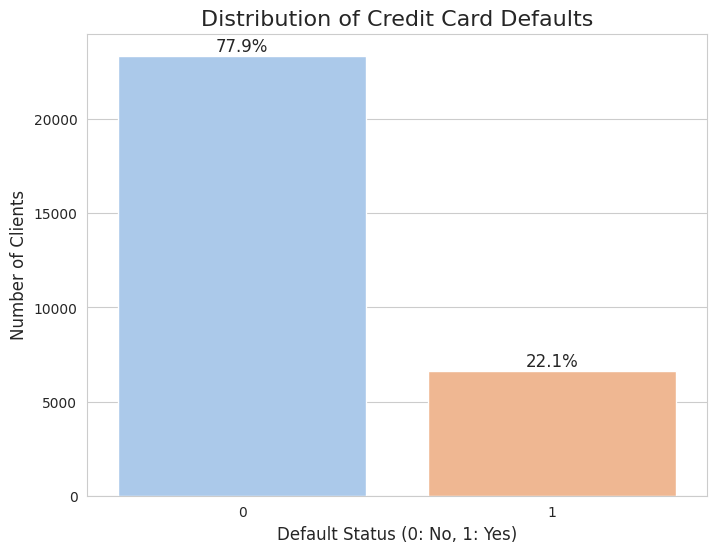

/tmp/ipython-input-295342781.py:87: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EDUCATION', y='DEFAULT', data=df, palette='viridis', ci=None)
/tmp/ipython-input-295342781.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EDUCATION', y='DEFAULT', data=df, palette='viridis', ci=None)


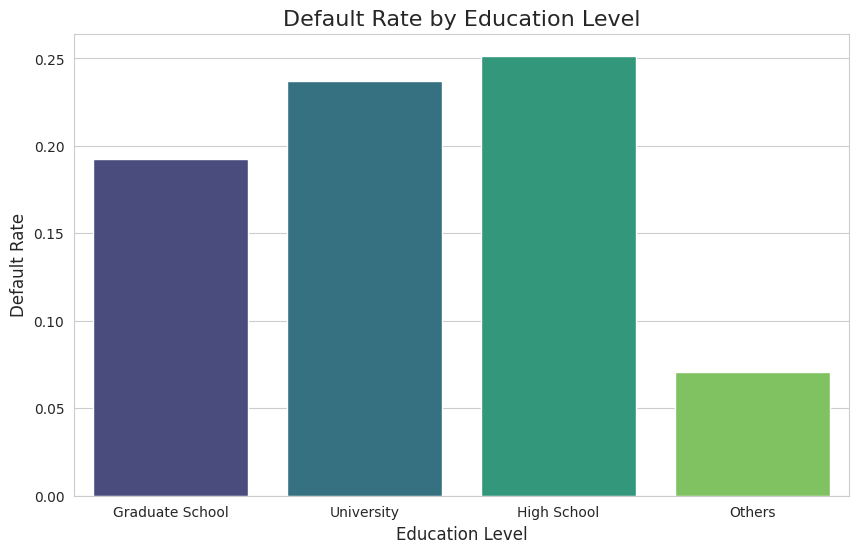

/tmp/ipython-input-295342781.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MARRIAGE', y='DEFAULT', data=df, palette='plasma', ci=None)
/tmp/ipython-input-295342781.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MARRIAGE', y='DEFAULT', data=df, palette='plasma', ci=None)


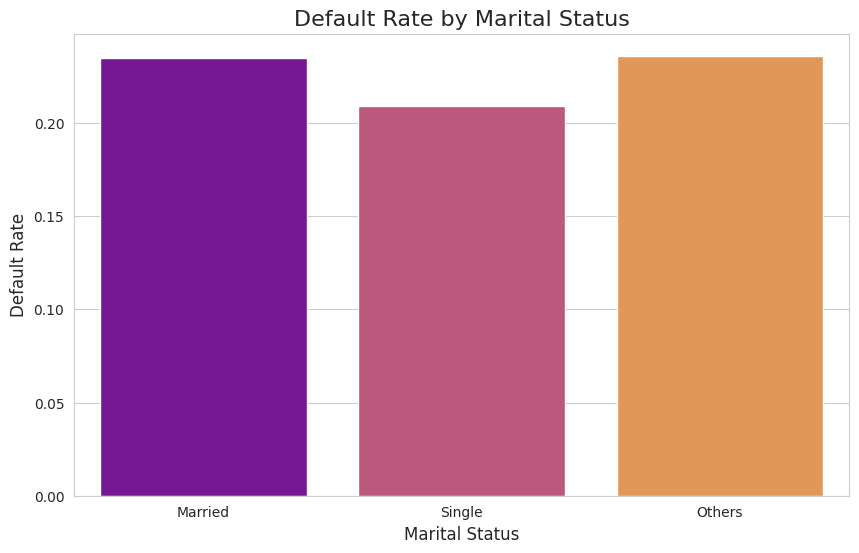

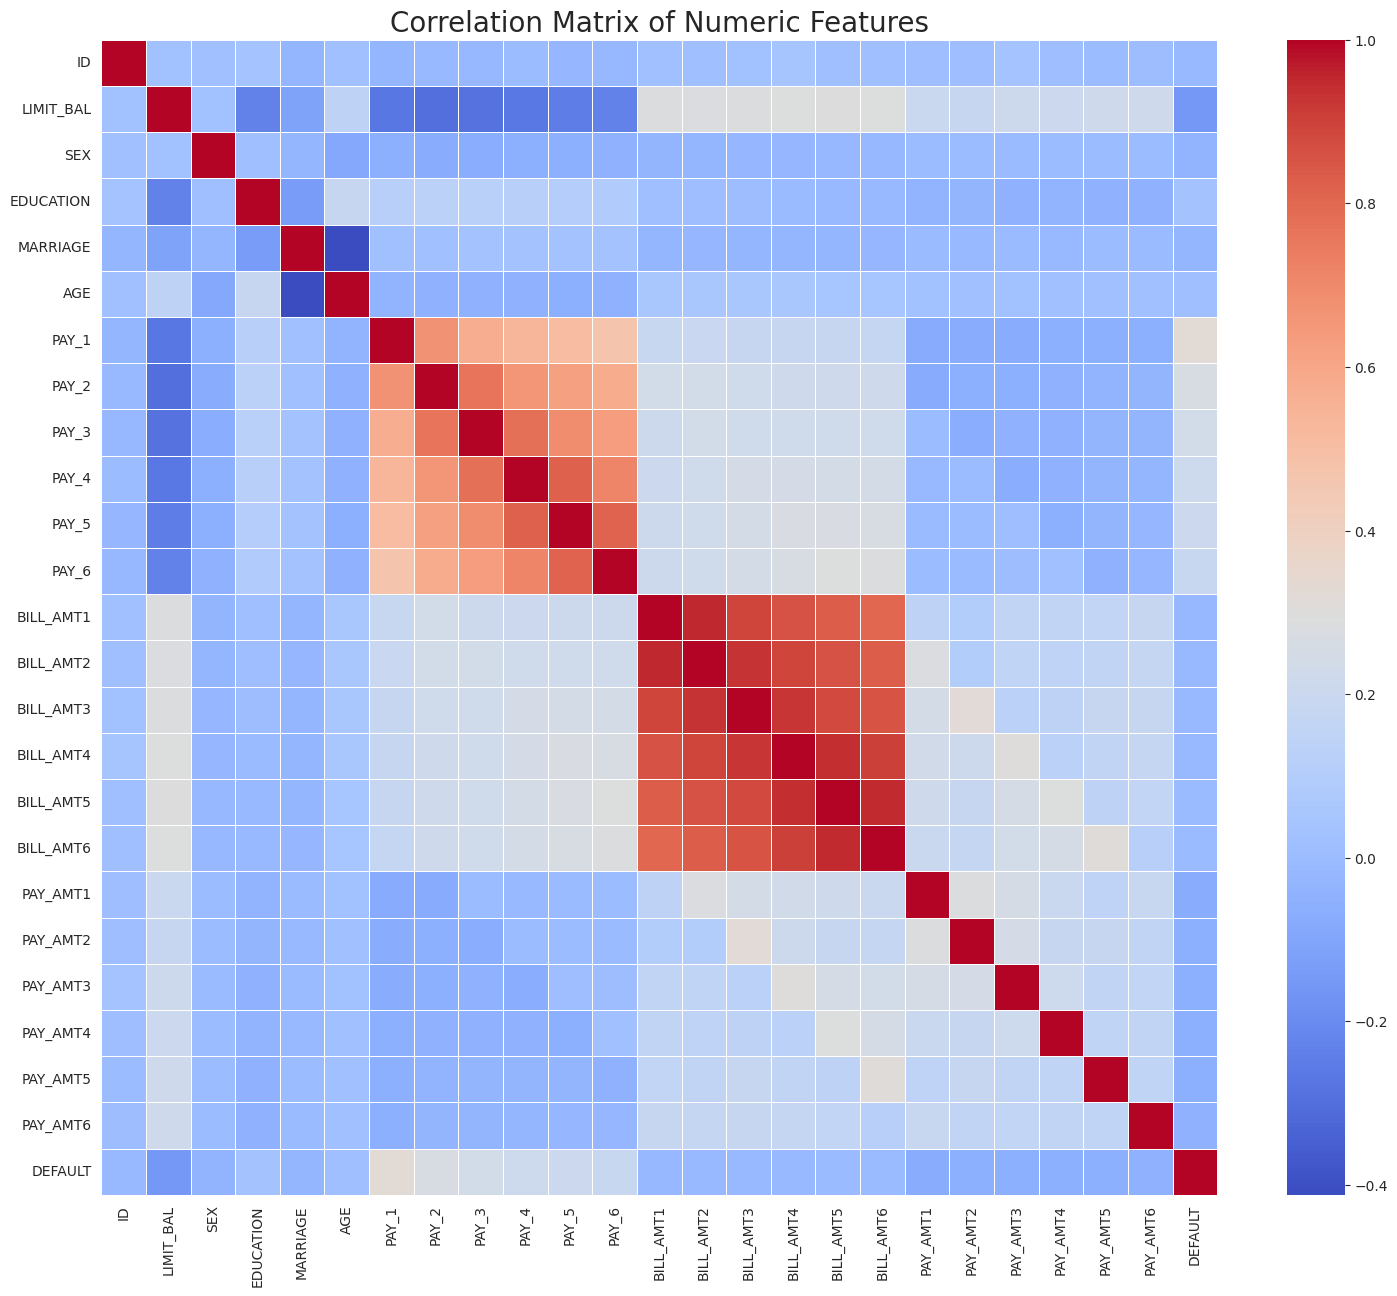

EDA visualizations generated.

--- Starting Model Building ---
Data split into training and testing sets.
Training set shape: (24000, 23)
Testing set shape: (6000, 23)

Training Logistic Regression model...
Logistic Regression training complete.

Training Decision Tree model...
Decision Tree training complete.

Training Random Forest model...
Random Forest training complete.

--- Starting Model Evaluation ---

--- Logistic Regression Performance ---
Accuracy: 0.8083

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



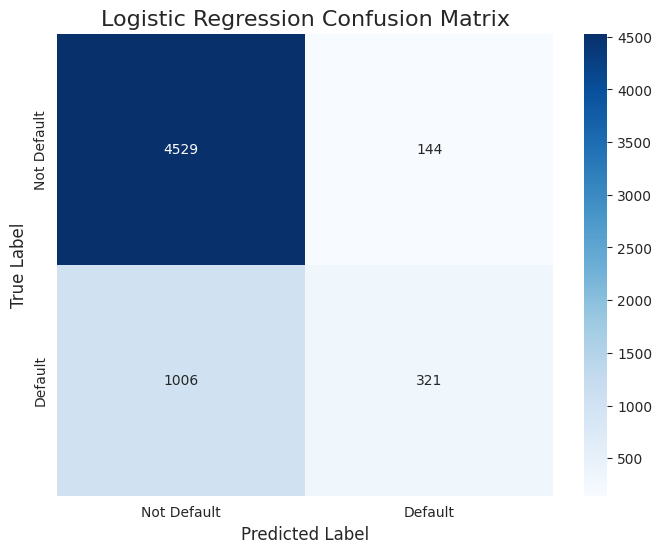


--- Decision Tree Performance ---
Accuracy: 0.8172

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



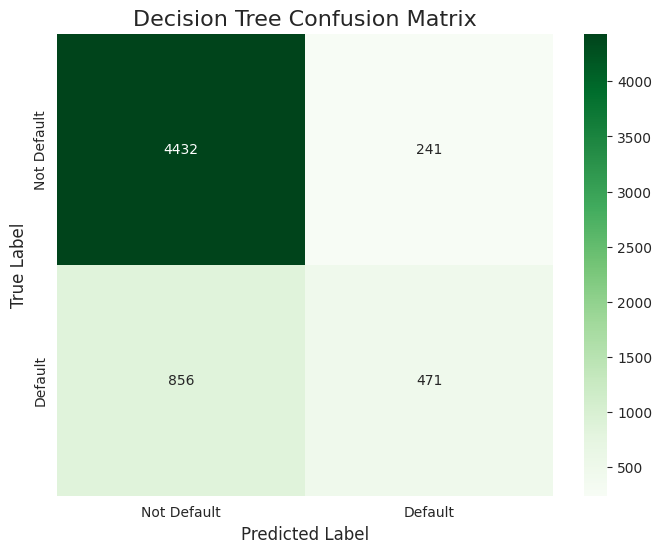


--- Random Forest Performance ---
Accuracy: 0.8172

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



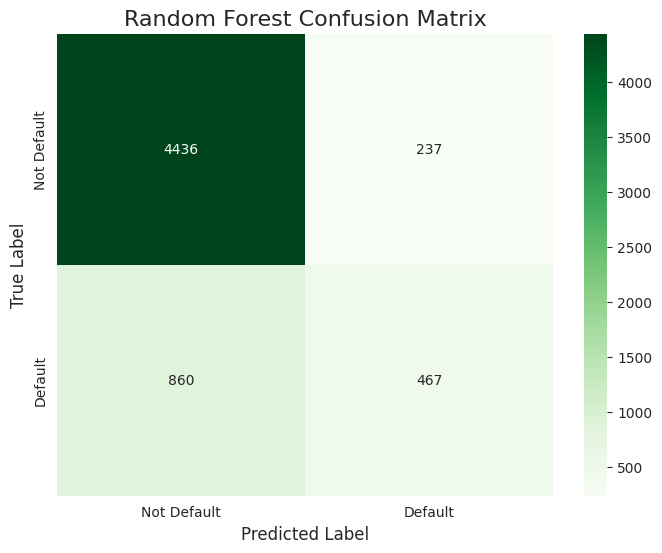


--- Final Model Comparison ---
Comparison of Model Performance Metrics:
                     Accuracy  Precision (Default)  Recall (Default)  \
Model                                                                  
Logistic Regression    0.8083               0.6903            0.2419   
Decision Tree          0.8172               0.6615            0.3549   
Random Forest          0.8172               0.6634            0.3519   

                     F1-Score (Default)  
Model                                    
Logistic Regression              0.3583  
Decision Tree                    0.4620  
Random Forest                    0.4599  

--- Feature Importance from Random Forest ---


/tmp/ipython-input-295342781.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')


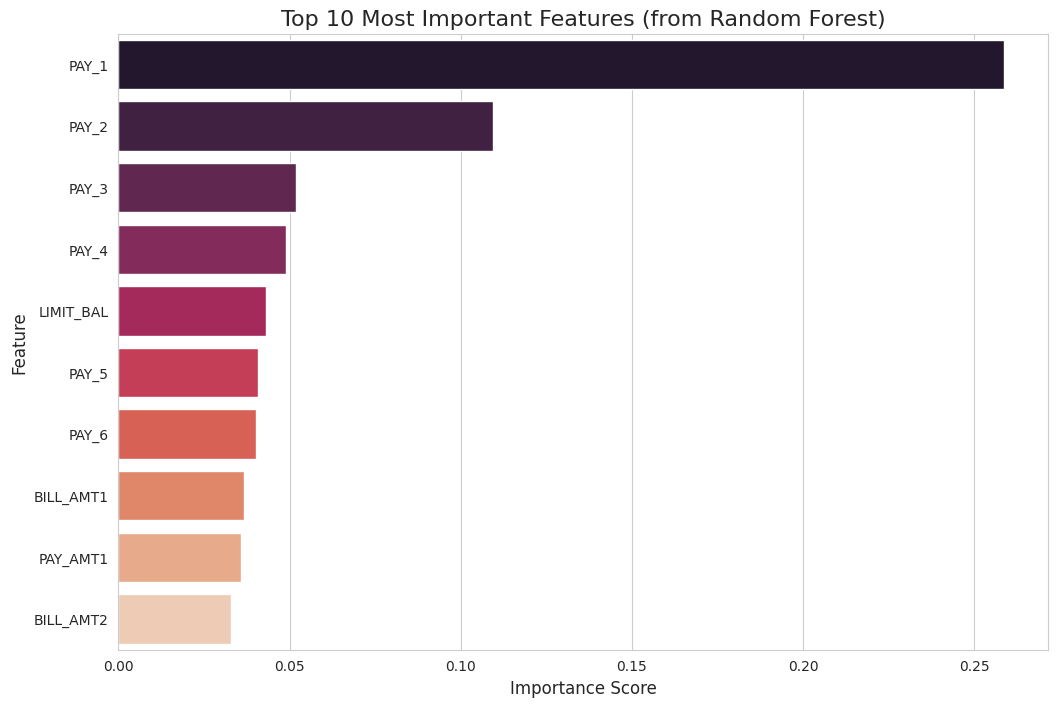


--- Analysis Complete ---


In [2]:
# BDM Capstone Project: Data-Driven Credit Risk Assessment
# Author: Jatin Puri
#
# This script performs a complete analysis of the 'Default of Credit Card Clients' dataset.
# It covers initial statistics, data cleaning, EDA, building and comparing three
# different classification models, and evaluating their performance.

# --- 1. Setup and Data Loading ---

# Install the required library to read Excel files
!pip install xlrd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from the Excel file
# Make sure to upload 'data.xls' to your Colab session
try:
    # Reading an Excel file. The data is expected to start from the second row (header=1).
    df = pd.read_excel('data.xls', header=1)
    print("Dataset 'data.xls' loaded successfully.")
except FileNotFoundError:
    print("Error: 'data.xls' not found.")
    print("Please upload the file to your Colab environment.")
    # Create a dummy dataframe to avoid further errors in the script
    df = pd.DataFrame()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    df = pd.DataFrame()


if not df.empty:
    # --- 2. Initial Data Exploration & Statistics (Before Cleaning) ---
    print("\n--- Descriptive Statistics Before Cleaning ---")
    # This shows the initial state of the numerical data
    print(df.describe())

    # --- 3. Data Cleaning and Preprocessing ---
    print("\n--- Starting Data Cleaning and Preprocessing ---")

    # Rename columns for clarity
    df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'DEFAULT'}, inplace=True)

    # Handle undocumented categories in EDUCATION
    # Grouping 0, 5, 6 into the 'Others' category (4)
    df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

    # Handle undocumented categories in MARRIAGE
    # Grouping 0 into the 'Others' category (3)
    df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

    print("Data Cleaning Complete. Categories in 'EDUCATION' and 'MARRIAGE' have been standardized.")
    print(f"\nDataset shape after cleaning: {df.shape}")
    print("\nFirst 5 rows of the cleaned dataset:")
    print(df.head())

    # --- 4. Exploratory Data Analysis (EDA) ---
    print("\n--- Starting Exploratory Data Analysis (EDA) ---")

    # Set plot style
    sns.set_style("whitegrid")

    # 4.1: Distribution of the Target Variable (Default)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='DEFAULT', data=df, palette='pastel')
    plt.title('Distribution of Credit Card Defaults', fontsize=16)
    plt.xlabel('Default Status (0: No, 1: Yes)', fontsize=12)
    plt.ylabel('Number of Clients', fontsize=12)
    total = len(df)
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.gca().annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
    plt.show()

    # 4.2: Default Rate by Education Level
    plt.figure(figsize=(10, 6))
    sns.barplot(x='EDUCATION', y='DEFAULT', data=df, palette='viridis', ci=None)
    plt.title('Default Rate by Education Level', fontsize=16)
    plt.xlabel('Education Level', fontsize=12)
    plt.ylabel('Default Rate', fontsize=12)
    plt.xticks(ticks=range(4), labels=['Graduate School', 'University', 'High School', 'Others'])
    plt.show()

    # 4.3: Default Rate by Marital Status
    plt.figure(figsize=(10, 6))
    sns.barplot(x='MARRIAGE', y='DEFAULT', data=df, palette='plasma', ci=None)
    plt.title('Default Rate by Marital Status', fontsize=16)
    plt.xlabel('Marital Status', fontsize=12)
    plt.ylabel('Default Rate', fontsize=12)
    plt.xticks(ticks=range(3), labels=['Married', 'Single', 'Others'])
    plt.show()

    # 4.4: Correlation Heatmap for Numeric Features
    numeric_cols = df.select_dtypes(include=np.number).columns
    plt.figure(figsize=(18, 15))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features', fontsize=20)
    plt.show()
    print("EDA visualizations generated.")

    # --- 5. Model Building ---
    print("\n--- Starting Model Building ---")

    # 5.1: Prepare data for modeling
    X = df.drop(['ID', 'DEFAULT'], axis=1)
    y = df['DEFAULT']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale numerical features for Logistic Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Data split into training and testing sets.")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")

    # 5.2: Model 1 - Logistic Regression
    print("\nTraining Logistic Regression model...")
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log = log_reg.predict(X_test_scaled)
    print("Logistic Regression training complete.")

    # 5.3: Model 2 - Decision Tree Classifier
    print("\nTraining Decision Tree model...")
    dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42) # Limiting depth to prevent overfitting
    dt_clf.fit(X_train, y_train) # Tree models don't require scaling
    y_pred_dt = dt_clf.predict(X_test)
    print("Decision Tree training complete.")

    # 5.4: Model 3 - Random Forest Classifier
    print("\nTraining Random Forest model...")
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)
    print("Random Forest training complete.")


    # --- 6. Model Evaluation ---
    print("\n--- Starting Model Evaluation ---")

    models = {
        "Logistic Regression": y_pred_log,
        "Decision Tree": y_pred_dt,
        "Random Forest": y_pred_rf
    }

    results = []

    for name, y_pred in models.items():
        accuracy = accuracy_score(y_test, y_pred)
        # Calculate metrics specifically for the 'Default' class (label=1)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        results.append([name, accuracy, precision, recall, f1])

        print(f"\n--- {name} Performance ---")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' if name == "Logistic Regression" else "Greens",
                    xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
        plt.title(f'{name} Confusion Matrix', fontsize=16)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.show()

    # --- 7. Model Comparison and Feature Importance ---
    print("\n--- Final Model Comparison ---")

    results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision (Default)", "Recall (Default)", "F1-Score (Default)"])
    results_df.set_index("Model", inplace=True)

    print("Comparison of Model Performance Metrics:")
    print(results_df.round(4))

    print("\n--- Feature Importance from Random Forest ---")
    # Using Random Forest for more stable feature importances
    importances = rf_clf.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
    plt.title('Top 10 Most Important Features (from Random Forest)', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()

    print("\n--- Analysis Complete ---")